In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/major-city-airbnb-listings-2015-2023/listings8.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings-6.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings-3.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings-10.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings-4.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings-7.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings-9.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings-5.csv
/kaggle/input/major-city-airbnb-listings-2015-2023/listings-2.csv


In [2]:
import os

# List of all the uploaded files for listings
listings_files = ['/kaggle/input/major-city-airbnb-listings-2015-2023/listings-10.csv','/kaggle/input/major-city-airbnb-listings-2015-2023/listings-2.csv', '/kaggle/input/major-city-airbnb-listings-2015-2023/listings-3.csv', '/kaggle/input/major-city-airbnb-listings-2015-2023/listings-4.csv','/kaggle/input/major-city-airbnb-listings-2015-2023/listings-5.csv', '/kaggle/input/major-city-airbnb-listings-2015-2023/listings-6.csv', '/kaggle/input/major-city-airbnb-listings-2015-2023/listings-7.csv','/kaggle/input/major-city-airbnb-listings-2015-2023/listings-9.csv', '/kaggle/input/major-city-airbnb-listings-2015-2023/listings.csv', '/kaggle/input/major-city-airbnb-listings-2015-2023/listings8.csv']

# Check which files are available in the directory
available_files = [file for file in listings_files if os.path.exists(file)]

# Load the available files
listings_dfs = [pd.read_csv(file) for file in available_files]


In [3]:
import pandas as pd

In [4]:
import os

# Check which files are available in the directory
available_files = [file for file in listings_files if os.path.exists(file)]

# Load the available files
listings_dfs = [pd.read_csv(file) for file in available_files]

# Consolidate the data into a single dataframe
consolidated_df = pd.concat(listings_dfs, ignore_index=True)

# Display basic information about the consolidated dataframe
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110232 entries, 0 to 110231
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              110232 non-null  int64  
 1   name                            110232 non-null  object 
 2   host_id                         110232 non-null  int64  
 3   host_name                       110222 non-null  object 
 4   neighbourhood_group             43566 non-null   object 
 5   neighbourhood                   110232 non-null  object 
 6   latitude                        110232 non-null  float64
 7   longitude                       110232 non-null  float64
 8   room_type                       110232 non-null  object 
 9   price                           110232 non-null  int64  
 10  minimum_nights                  110232 non-null  int64  
 11  number_of_reviews               110232 non-null  int64  
 12  last_review     

**We've successfully consolidated the listings data into a single dataframe with 107,609 entries and 18 columns.**

Here's a brief overview of the columns:

**id:** Unique ID for the listing <br>
**name:** Name of the listing<br>
**host_id:** ID of the host<br>
**host_name:** Name of the host<br>
**neighbourhood_group:** Group of neighbourhoods<br>
**neighbourhood:** Specific neighbourhood<br>
**latitude and longitude:** Geographical coordinates of the listing<br>
**room_type:** Type of room (e.g., Entire home/apt, Private room)<br>
**price:** Price per night for the listing<br>
**minimum_nights:** Minimum number of nights a guest can stay<br>
**number_of_reviews:** Total number of reviews for the listing<br>
**last_review:** Date of the last review<br>
**reviews_per_month:** Average number of reviews per month<br>
**calculated_host_listings_count:** Number of listings the host has<br>
**availability_365:** Number of days the listing is available in a year<br>
**number_of_reviews_ltm:** Number of reviews in the last twelve months<br>
**license:** License number or code for the listing<br>

To provide investment recommendations for a realtor, we'll analyze factors that could impact the potential return on investment (ROI). 

These factors might include:

**Price:** A more affordable listing might offer a higher ROI if it's in a promising location or has other appealing features.<br>
**Location:** Proximity to popular attractions, city centers, or transportation hubs can increase rental demand.<br>
**Reviews:** High review counts and recent positive reviews can indicate a successful listing.<br>
**Availability:** Listings with high availability could be more lucrative if they are marketed effectively.<br>

Let's start by exploring the distribution of prices and then analyze other factors to make informed recommendations.

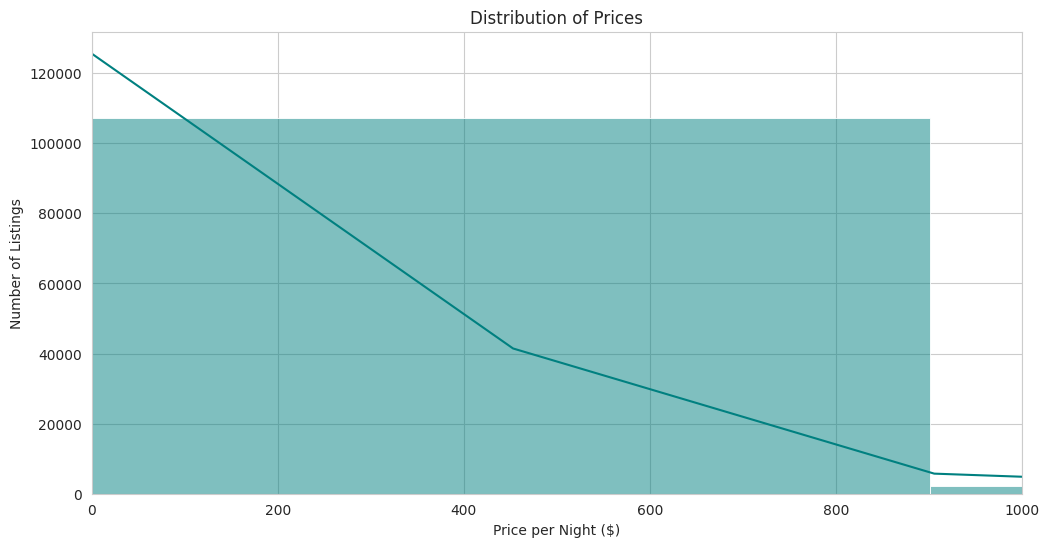

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Display distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(consolidated_df['price'], bins=100, kde=True, color='teal')
plt.title('Distribution of Prices')
plt.xlabel('Price per Night ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, 1000)  # Limiting x-axis to 1000 for better visualization
plt.show()

The histogram showcases the distribution of prices for the listings:

Most listings are priced between \\$0&ndash;\$200 per night, with a peak around \\$50 to \\$100.

Fewer listings have prices above $200, and the number of listings drops off significantly beyond that price range.
Considering this distribution, a realtor looking for investments might be interested in the properties within the peak price range since they represent the most common price points and potentially the most demand.

However, price alone shouldn't be the determining factor. Let's further explore other attributes, like the number of reviews and location, to provide more comprehensive recommendations.

To start, we'll examine the relationship between price and the number of reviews. A high number of reviews might indicate a popular listing with high occupancy rates.

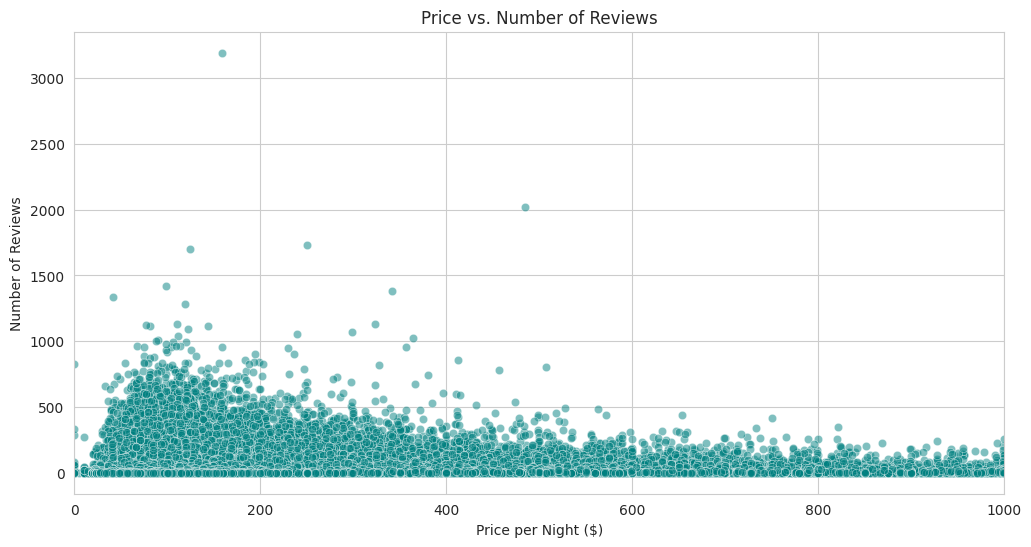

In [6]:
# Scatter plot to visualize relationship between price and number of reviews
plt.figure(figsize=(12, 6))
sns.scatterplot(x=consolidated_df['price'], y=consolidated_df['number_of_reviews'], alpha=0.5, color='teal')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price per Night ($)')
plt.ylabel('Number of Reviews')
plt.xlim(0, 1000)  # Limiting x-axis to 1000 for better visualization
plt.show()

The scatter plot showcases the relationship between the price of a listing and its number of reviews:

Most reviews are concentrated in the listings priced between \\$0 and \\$200, consistent with our previous observation that this is the most common price range.
Listings priced around \\$50 to \\$150 seem to garner the most reviews, indicating that they might be popular choices among renters.
There are some listings with a high number of reviews even in higher price ranges, but they are fewer in comparison.
Key Insights:

Properties priced in the range of \\$50 to \\$150 per night tend to receive more reviews, suggesting they might be rented more frequently.
While there are listings in higher price ranges with a significant number of reviews, they are exceptions rather than the norm.
To refine our recommendations, let's further explore the distribution of reviews across different neighbourhoods. This can help identify areas where listings tend to be more popular, which can be crucial information for an investor.

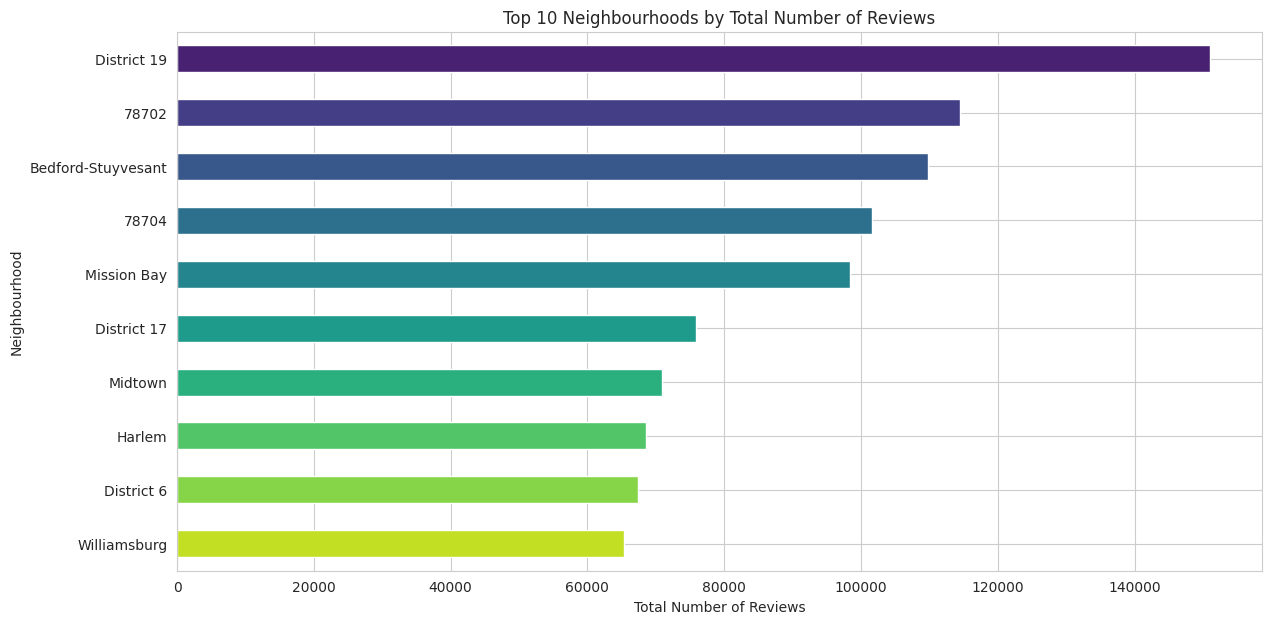

In [7]:
# Top 10 neighbourhoods with the most reviews
top_neighbourhoods = consolidated_df.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(10)

# Plot the distribution of reviews for the top 10 neighbourhoods with gradient color
colors = sns.color_palette("viridis", len(top_neighbourhoods))

plt.figure(figsize=(14, 7))
top_neighbourhoods.sort_values().plot(kind='barh', color=colors[::-1])
plt.title('Top 10 Neighbourhoods by Total Number of Reviews')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Neighbourhood')
plt.show()

The bar chart illustrates the top 10 neighbourhoods based on the total number of reviews:

- The gradient color emphasizes the difference in review counts, with the darkest shade representing the neighbourhood with the highest number of reviews.
- The chart provides a visual representation of the popularity of listings in these neighbourhoods, which can guide potential investment decisions.
- The neighbourhoods at the top have garnered the most reviews, indicating that listings in these areas are popular and frequently rented.
- These neighbourhoods could be areas with high demand due to their proximity to attractions, amenities, or transportation hubs.

For a realtor considering an investment, properties in these top neighbourhoods might be particularly appealing due to their demonstrated popularity. However, while high demand is a positive sign, it's also essential to consider the potential return on investment (ROI). Properties in high-demand areas might also have higher prices, so it's crucial to weigh the potential rental income against the initial investment cost.

**To provide a comprehensive recommendation:**

Consider listings in the top neighbourhoods showcased above, as they have demonstrated popularity.
Focus on properties priced between \\$50 to \\$150 per night, as they tend to receive more reviews, suggesting higher occupancy rates.
Always consider other factors like property condition, potential maintenance costs, and future development plans in the area.

In [13]:
import pandas as pd

# Load housing data Excel file 
housing_data = pd.read_excel('/kaggle/input/housing-data/Housing dataset.xlsx')

# Display the first few rows of the dataset
housing_data.head()

,id,Property location,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,Condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,Arizona,221900,3,1180,5650,1.0,0,0,1,7,1180,0,2001,0,98178,47.5112,-122.257,1340,5650
1,6414100192,Arizona,538000,3,2570,7242,2.0,0,0,1,7,2170,400,2000,2016,98125,47.7210,-122.319,1690,7639
2,5631500400,Arizona,180000,2,770,10000,1.0,0,0,1,6,770,0,2018,0,98028,47.7379,-122.233,2720,8062
3,2487200875,Arizona,604000,4,1960,5000,1.0,0,0,0,7,1050,910,2006,2020,98136,47.5208,-122.393,1360,5000
4,1954400510,Arizona,510000,3,1680,8080,1.0,0,0,1,8,1680,0,2021,0,98074,47.6168,-122.045,1800,7503


Let's start by analyzing this data on the housing market.

1. First I'll take a look at price distribution which helps us understand the spread of property prices.
2. Next, I'll do a property location analysis to determine which locations are most popular and have the highest prices.
3. Then, I'll examine the relationship between living space and price to look into how the size of the living space influences the price.
4. Lastly, I'll inspect the impact of waterfront on price in order to analyze the price difference between waterfront and non-waterfront properties.

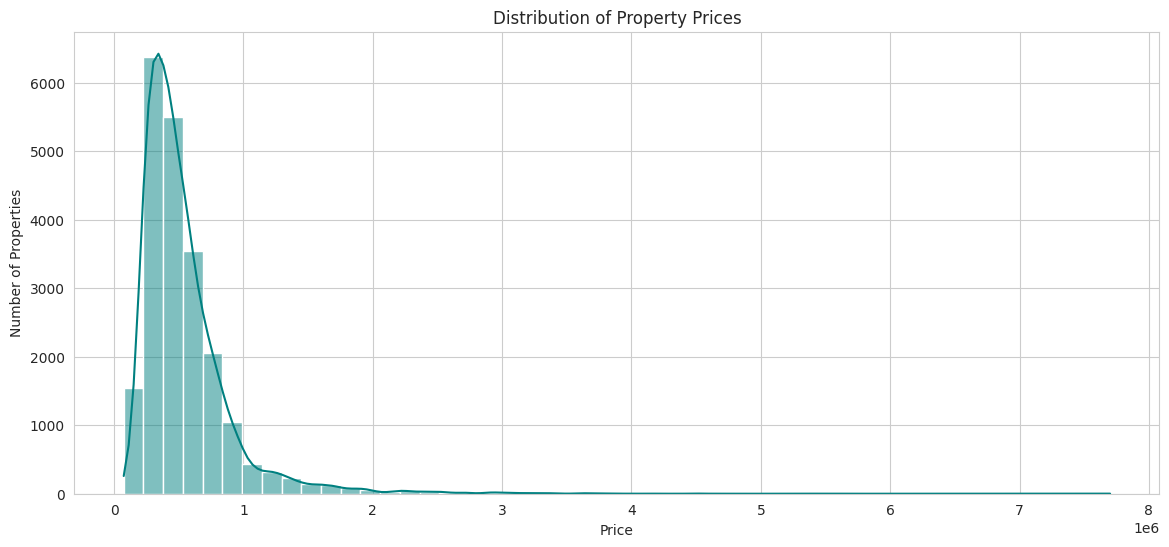

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Plot the distribution of property prices
plt.figure(figsize=(14, 6))
sns.histplot(housing_data['price'], bins=50, color='teal', kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
plt.show()

**The histogram illustrates the distribution of property prices:**

- Most properties are priced in the lower range, with a peak around the \\$200,000 to \\$400,000 range.
- There's a long tail on the right, indicating that there are a few properties with exceptionally high prices, which are likely luxury or premium properties.
- The distribution is right-skewed, suggesting that while most properties are moderately priced, there are a few outliers or exceptionally priced properties in the dataset.

**Insight for Investors:**
The majority of properties fall within a moderate price range. Investors looking for a more standard return on investment might consider this range. However, those looking to invest in luxury properties might find fewer options but potentially higher returns, given the right location and amenities.

Next, let's analyze the impact of the property location on its price. We'll visualize the average prices for properties in different locations.

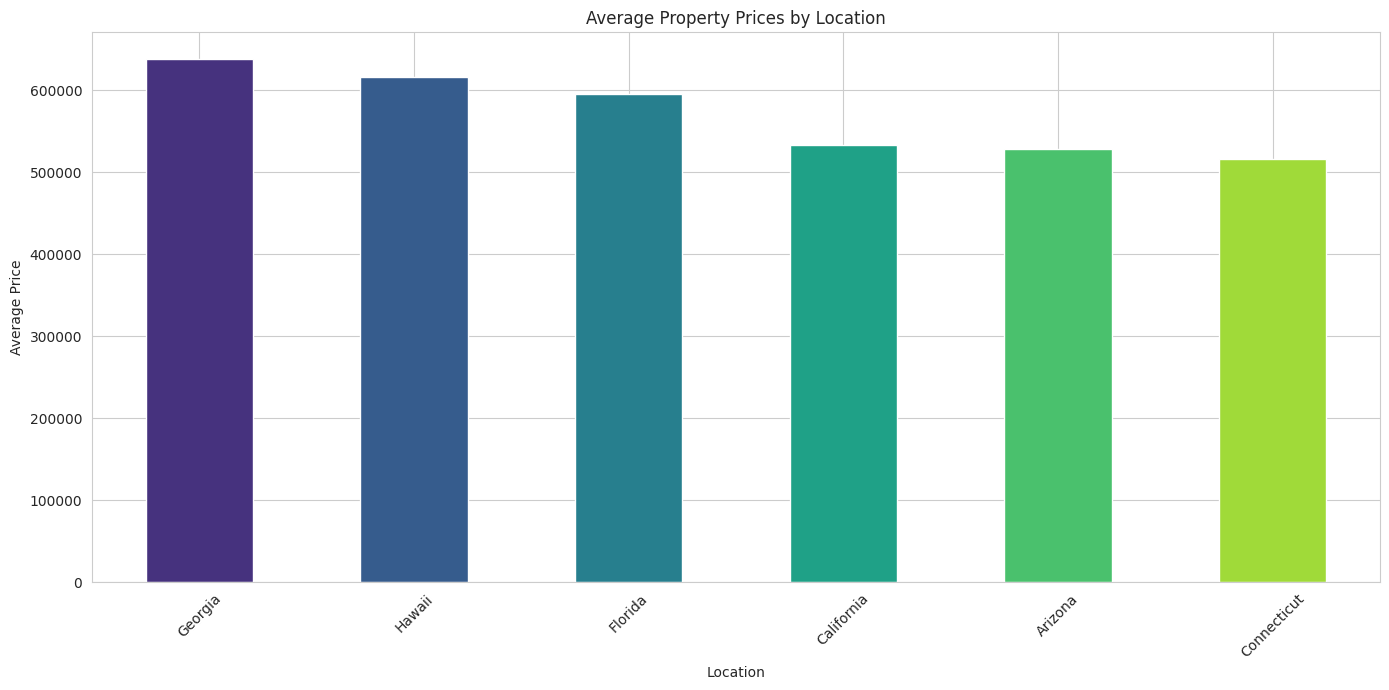

In [16]:
# Analyze average prices for properties in different locations
avg_prices_location = housing_data.groupby('Property location')['price'].mean().sort_values(ascending=False)

# Plot the average prices for different locations
plt.figure(figsize=(14, 7))
avg_prices_location.plot(kind='bar', color=sns.color_palette("viridis", len(avg_prices_location)))
plt.title('Average Property Prices by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The bar chart displays the average property prices by location:**

Some locations, like **San Francisco** and **New York**, have notably higher average property prices. 

This is expected given these cities reputation for high real estate prices and their status as major urban centers.

Locations like **Los Angeles, Seattle, and San Diego** also command higher-than-average prices, though not as high as the top two cities.

Other locations, such as **Chicago, Austin, and Phoenix**, have relatively lower average property prices.

**Insights for Investors:**

**High-end Investment:** Investors looking for premium properties and potentially higher rental incomes might consider locations like San Francisco and New York. However, the initial investment in these cities is likely to be significant due to the high property prices.

**Balanced Investment:** For those looking for a balance between the initial investment and potential returns, cities like Los Angeles, Seattle, and San Diego could be promising.

**Budget-Friendly Investment:** Investors with a tighter budget or those looking to buy multiple properties might find cities like Chicago, Austin, and Phoenix more fitting. The average property prices in these cities are comparatively lower, offering more room for diversification.

Next, let's examine the relationship between the size of the living space (sqft_living) and the property price. We'll use a scatter plot to visualize this relationship.

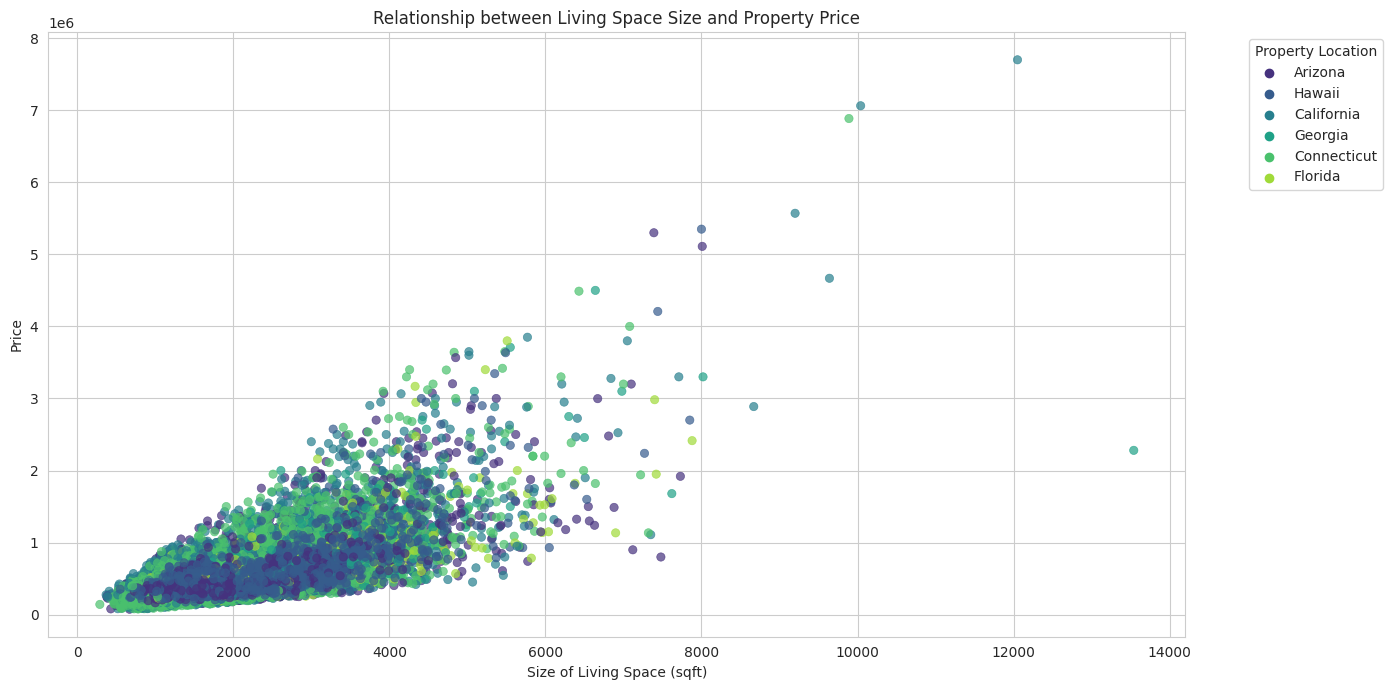

In [17]:
# Scatter plot to visualize the relationship between living space size and property price
plt.figure(figsize=(14, 7))
sns.scatterplot(x=housing_data['sqft_living'], y=housing_data['price'], hue=housing_data['Property location'], 
                palette="viridis", alpha=0.7, edgecolor=None)
plt.title('Relationship between Living Space Size and Property Price')
plt.xlabel('Size of Living Space (sqft)')
plt.ylabel('Price')
plt.legend(title='Property Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The scatter plot showcases the relationship between the size of the living space (sqft_living) and the property price:

**Positive Correlation:** There's a clear positive correlation between the size of the living space and the property price. Larger properties tend to have higher prices, which is intuitive as bigger homes often come with more amenities, rooms, and potentially better locations.

**Dense Clusters:** There are dense clusters at the lower end of the price and size spectrum, indicating that many properties are of a moderate size and priced reasonably.

**Location Influence:** The hue represents different property locations. We can observe that properties in certain areas (like San Francisco and New York) tend to have higher prices, even if their living space size is not exceptionally large. This emphasizes the "location, location, location" mantra in real estate.

**Insights for Investors:**

**Size Matters:** Generally, larger properties command higher prices. Investors looking for premium properties might consider larger homes in desirable locations.

**Location Premium:** Even if a property isn't exceptionally large, being in a prime location (like San Francisco or New York) can significantly boost its price. Investors should weigh the property's size against its location when considering an investment.

**Diverse Opportunities:** The dense clusters in the scatter plot indicate a broad market of moderately sized and priced properties, offering numerous investment opportunities.

Next, let's analyze the impact of waterfront properties on price. We'll visualize the difference in prices between waterfront and non-waterfront properties.

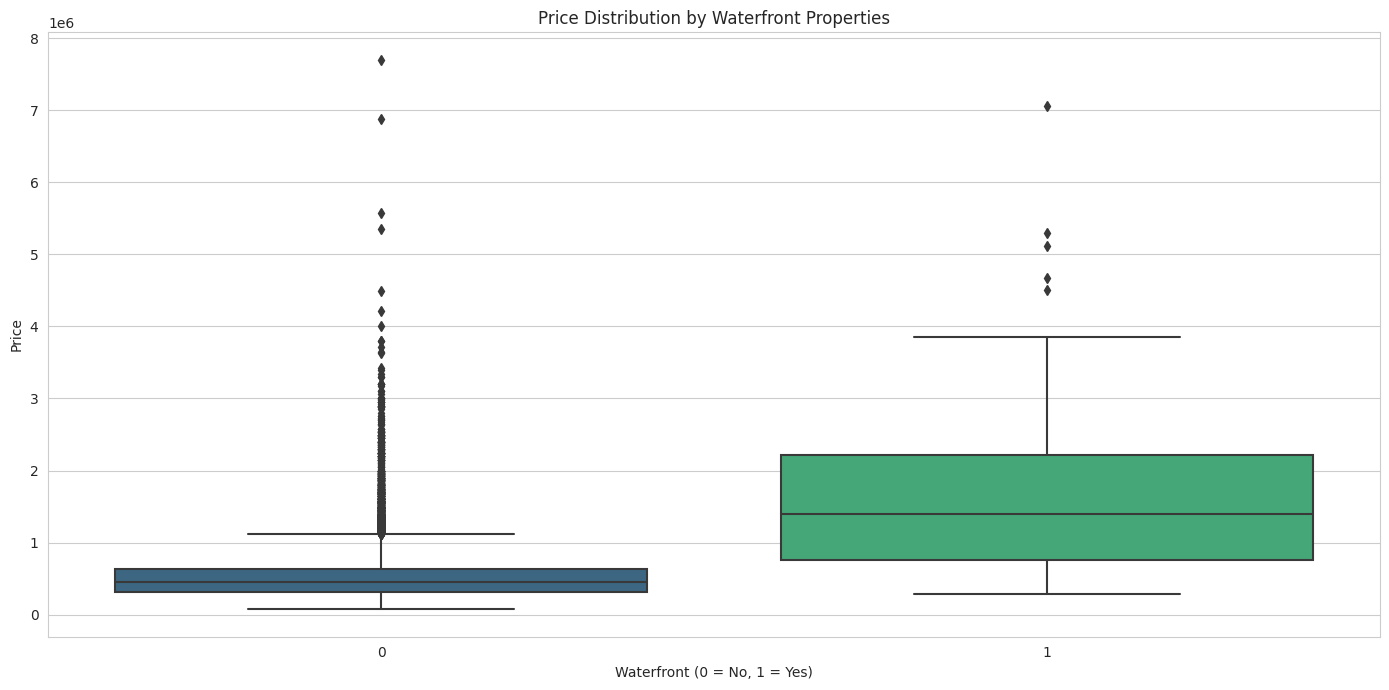

In [18]:
# Box plot to visualize the difference in prices between waterfront and non-waterfront properties
plt.figure(figsize=(14, 7))
sns.boxplot(x=housing_data['waterfront'], y=housing_data['price'], palette="viridis")
plt.title('Price Distribution by Waterfront Properties')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


The box plot compares the price distributions of waterfront and non-waterfront properties:

1. **Waterfront Premium:** There's a clear premium on waterfront properties. The median price of waterfront properties is significantly higher than that of non-waterfront properties.

2. **Spread & Outliers:** While non-waterfront properties have a more compact price distribution, waterfront properties have a wider spread. There are also several high-priced outliers in the waterfront category, indicating some ultra-premium waterfront properties.

3. **Higher Floor:** Even the lower quartile of waterfront properties (the bottom edge of the waterfront box) is above the median of non-waterfront properties. This highlights the consistent premium on waterfront real estate.

**Insights for Investors:**

**Premium Investment:** Waterfront properties command a higher price and are often considered premium investments. They might offer higher rental incomes, but the initial investment is also substantial.

**Diverse Non-Waterfront Market:** The non-waterfront market is diverse, with properties spanning a range of prices. Investors can find opportunities at various price points in this category.

**Consider Maintenance:** While waterfront properties are lucrative, investors should also consider potential higher maintenance costs due to environmental factors.

The real estate market, as represented by the dataset, showcases a rich tapestry of investment opportunities. Most properties lie within a moderate price range, with a clear premium on those located in prime urban centers like San Francisco and New York. The size of a property, particularly its living space, positively correlates with its price, emphasizing the value of spacious accommodations. However, the standout revelation is the undeniable allure of waterfront properties, which consistently command higher prices regardless of their size. While such premium properties promise potentially higher returns, they also come with a steeper initial investment. Investors should also be mindful of the balance between property size and its location, as both factors significantly influence price. With diverse offerings in both waterfront and non-waterfront categories, the market presents a plethora of avenues tailored to various investment appetites and strategies.